In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np

# Lectura de datos desde el repositorio de GitHub

Los archivos se guardan en el orden de aparición del repositorio de GitHub en el arreglo dfs.

In [ ]:
# URL del repositorio en GitHub
repo_url = "https://api.github.com/repos/Teffym3A/La-fisica-del-Telefonito/contents/Montaje_Experimental/Datos_Experimentales"

# Obtener la lista de archivos en el repositorio
response = requests.get(repo_url)
data = response.json()

# Lista para almacenar los DataFrames
dfs = []

# Leer cada archivo .txt y convertirlo en un DataFrame de pandas
for file in data:
    if file['name'].endswith('.txt'):
        # Obtener la URL cruda del archivo
        raw_url = file['download_url']

        # Leer el archivo como DataFrame
        df = pd.read_csv(raw_url, delimiter=',')  # Puedes ajustar el delimitador según el formato de tus archivos
        dfs.append(df)

# Análisis de las frecuencias obtenidas

## Lata - Cordón Blanco - 1.92 m

Pendiente ajustada: 0.3389473677454683
Desviación de la pendiente: -2.6610526322545316
Coeficiente de determinación (R^2): 0.3225609328338165


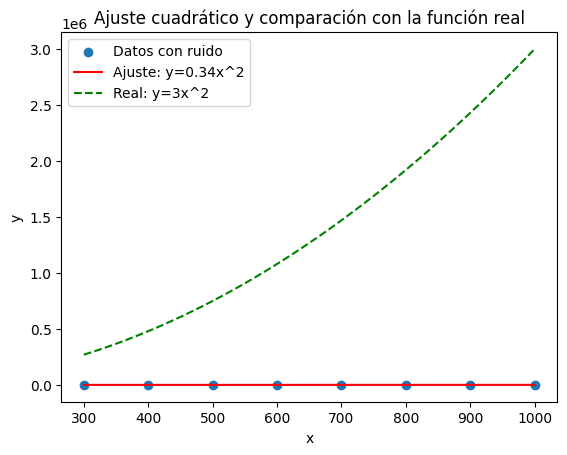

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definir la función cuadrática y=mx^2
def cuadratica(x, m):
    return m * x + 300

# Generar datos de ejemplo
x_datos = dfs[2]['FI'][:8]
y_datos = dfs[2]['FF'][:8]

# Ajustar los datos a la función cuadrática
parametros_optimos, matriz_covarianza = curve_fit(cuadratica, x_datos, y_datos)

# Obtener los resultados del ajuste
pendiente_ajustada = parametros_optimos[0]

# Calcular la desviación de la pendiente
pendiente_real = 3
desviacion_pendiente = pendiente_ajustada - pendiente_real

# Calcular el coeficiente de determinación (R^2)
residuos = y_datos - cuadratica(x_datos, pendiente_ajustada)
ssr = np.sum(residuos**2)  # Suma de residuos al cuadrado
sst = np.sum((y_datos - np.mean(y_datos))**2)  # Suma total de cuadrados
r_cuadrado = 1 - (ssr / sst)

# Imprimir resultados
print(f"Pendiente ajustada: {pendiente_ajustada}")
print(f"Desviación de la pendiente: {desviacion_pendiente}")
print(f"Coeficiente de determinación (R^2): {r_cuadrado}")

# Graficar los resultados
x_grafica = np.linspace(min(x_datos), max(x_datos), 100)
y_ajustada = cuadratica(x_grafica, pendiente_ajustada)

plt.scatter(x_datos, y_datos, label='Datos con ruido')
plt.plot(x_grafica, y_ajustada, label=f'Ajuste: y={pendiente_ajustada:.2f}x^2', color='red')
plt.plot(x_grafica, 3 * x_grafica**2, label='Real: y=3x^2', linestyle='--', color='green')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste cuadrático y comparación con la función real')
plt.show()

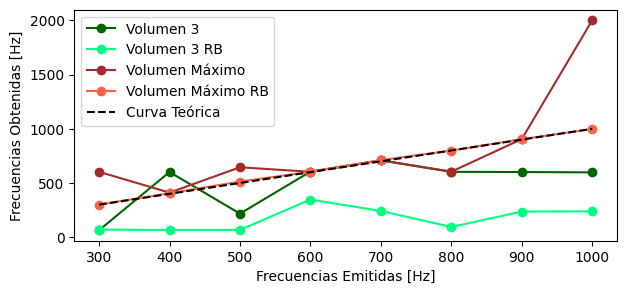

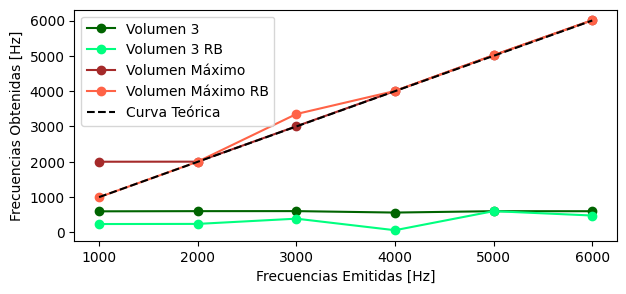

In [ ]:
plt.figure(figsize=(7, 3))

# Graficar las segundas columnas contra las primeras
plt.plot(dfs[2]['FI'][:8],dfs[2]['FF'][:8], label='Volumen 3', marker='o', color='darkgreen')
plt.plot(dfs[0]['FI'][:8],dfs[0]['FF'][:8], label='Volumen 3 RB', marker='o', color='springgreen')
plt.plot(dfs[3]['FI'][:8],dfs[3]['FF'][:8], label='Volumen Máximo', marker='o', color='brown')
plt.plot(dfs[1]['FI'][:8],dfs[1]['FF'][:8], label='Volumen Máximo RB', marker='o', color='tomato')
plt.plot(dfs[0]['FI'][:8],dfs[0]['FI'][:8], label='Curva Teórica', color='black', linestyle = '--')

# Agregar etiquetas y título al gráfico
plt.xlabel('Frecuencias Emitidas [Hz]')
plt.ylabel('Frecuencias Obtenidas [Hz]')
plt.legend()

# Mostrar el gráfico
plt.show()

plt.figure(figsize=(7, 3))

# Graficar las segundas columnas contra las primeras
plt.plot(dfs[2]['FI'][7:],dfs[2]['FF'][7:], label='Volumen 3', marker='o', color='darkgreen')
plt.plot(dfs[0]['FI'][7:],dfs[0]['FF'][7:], label='Volumen 3 RB', marker='o', color='springgreen')
plt.plot(dfs[3]['FI'][7:],dfs[3]['FF'][7:], label='Volumen Máximo', marker='o', color='brown')
plt.plot(dfs[1]['FI'][7:],dfs[1]['FF'][7:], label='Volumen Máximo RB', marker='o', color='tomato')
plt.plot(dfs[0]['FI'][7:],dfs[0]['FI'][7:], label='Curva Teórica',color='black', linestyle = '--')

# Agregar etiquetas y título al gráfico
plt.xlabel('Frecuencias Emitidas [Hz]')
plt.ylabel('Frecuencias Obtenidas [Hz]')
plt.legend()

# Mostrar el gráfico
plt.show()

Pendiente ajustada: 2.867237411202904
Desviación de la pendiente: -0.13276258879709602
Coeficiente de determinación (R^2): 0.9726746295723334


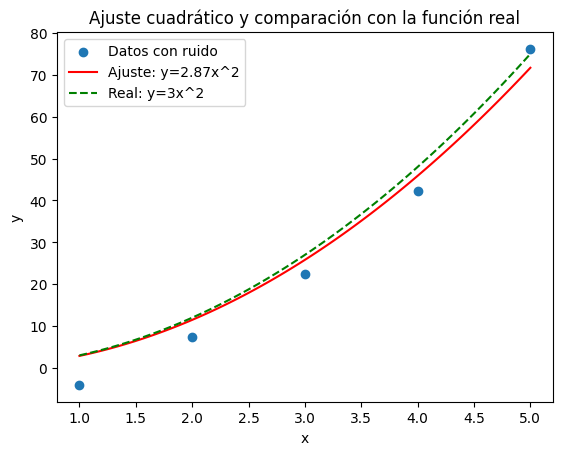

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definir la función cuadrática y=mx^2
def cuadratica(x, m):
    return m * x**2

# Generar datos de ejemplo
x_datos = np.array([1, 2, 3, 4, 5])
y_datos = 3 * x_datos**2 + np.random.normal(scale=5, size=len(x_datos))  # Agregar ruido

# Ajustar los datos a la función cuadrática
parametros_optimos, matriz_covarianza = curve_fit(cuadratica, x_datos, y_datos)

# Obtener los resultados del ajuste
pendiente_ajustada = parametros_optimos[0]

# Calcular la desviación de la pendiente
pendiente_real = 3
desviacion_pendiente = pendiente_ajustada - pendiente_real

# Calcular el coeficiente de determinación (R^2)
residuos = y_datos - cuadratica(x_datos, pendiente_ajustada)
ssr = np.sum(residuos**2)  # Suma de residuos al cuadrado
sst = np.sum((y_datos - np.mean(y_datos))**2)  # Suma total de cuadrados
r_cuadrado = 1 - (ssr / sst)

# Imprimir resultados
print(f"Pendiente ajustada: {pendiente_ajustada}")
print(f"Desviación de la pendiente: {desviacion_pendiente}")
print(f"Coeficiente de determinación (R^2): {r_cuadrado}")

# Graficar los resultados
x_grafica = np.linspace(min(x_datos), max(x_datos), 100)
y_ajustada = cuadratica(x_grafica, pendiente_ajustada)

plt.scatter(x_datos, y_datos, label='Datos con ruido')
plt.plot(x_grafica, y_ajustada, label=f'Ajuste: y={pendiente_ajustada:.2f}x^2', color='red')
plt.plot(x_grafica, 3 * x_grafica**2, label='Real: y=3x^2', linestyle='--', color='green')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste cuadrático y comparación con la función real')
plt.show()

## Vaso - Cordón Blanco - 1.92 m

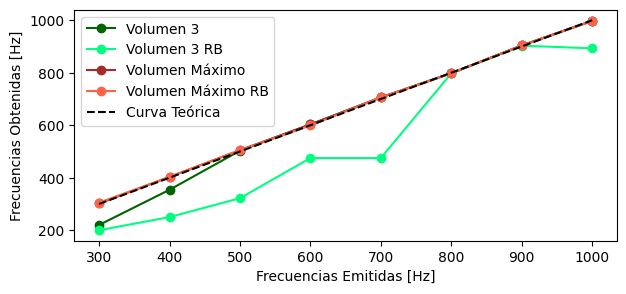

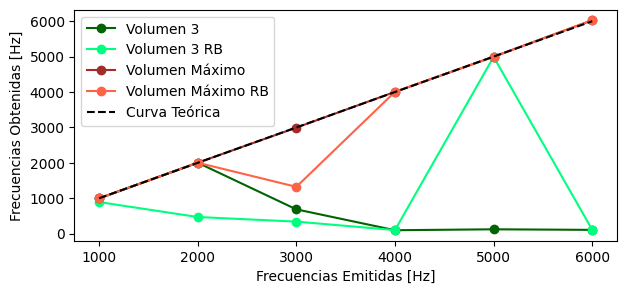

In [ ]:
plt.figure(figsize=(7, 3))

# Graficar las segundas columnas contra las primeras
plt.plot(dfs[6]['FI'][:8],dfs[6]['FF'][:8], label='Volumen 3', marker='o', color='darkgreen')
plt.plot(dfs[4]['FI'][:8],dfs[4]['FF'][:8], label='Volumen 3 RB', marker='o', color='springgreen')
plt.plot(dfs[7]['FI'][:8],dfs[7]['FF'][:8], label='Volumen Máximo', marker='o', color='brown')
plt.plot(dfs[5]['FI'][:8],dfs[5]['FF'][:8], label='Volumen Máximo RB', marker='o', color='tomato')
plt.plot(dfs[1]['FI'][:8],dfs[1]['FI'][:8], label='Curva Teórica', color='black', linestyle = '--')

# Agregar etiquetas y título al gráfico
plt.xlabel('Frecuencias Emitidas [Hz]')
plt.ylabel('Frecuencias Obtenidas [Hz]')
plt.legend()

# Mostrar el gráfico
plt.show()

plt.figure(figsize=(7, 3))

# Graficar las segundas columnas contra las primeras
plt.plot(dfs[6]['FI'][7:],dfs[6]['FF'][7:], label='Volumen 3', marker='o', color='darkgreen')
plt.plot(dfs[4]['FI'][7:],dfs[4]['FF'][7:], label='Volumen 3 RB', marker='o', color='springgreen')
plt.plot(dfs[7]['FI'][7:],dfs[7]['FF'][7:], label='Volumen Máximo', marker='o', color='brown')
plt.plot(dfs[5]['FI'][7:],dfs[5]['FF'][7:], label='Volumen Máximo RB', marker='o', color='tomato')
plt.plot(dfs[1]['FI'][7:],dfs[1]['FI'][7:], label='Curva Teórica',color='black', linestyle = '--')

# Agregar etiquetas y título al gráfico
plt.xlabel('Frecuencias Emitidas [Hz]')
plt.ylabel('Frecuencias Obtenidas [Hz]')
plt.legend()

# Mostrar el gráfico
plt.show()

## Vaso - Cordón Blanco - 1 m

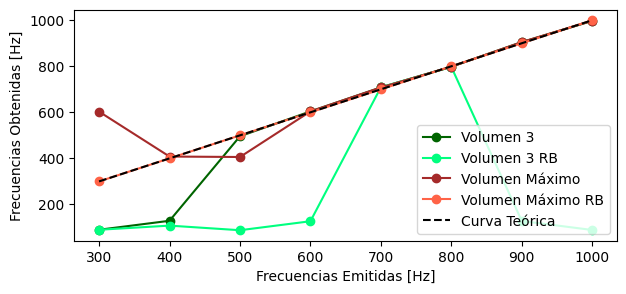

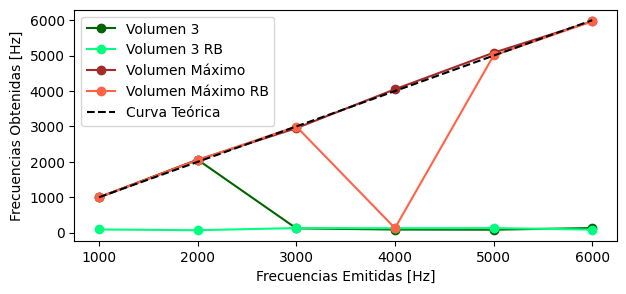

In [ ]:
plt.figure(figsize=(7, 3))

# Graficar las segundas columnas contra las primeras
plt.plot(dfs[10]['FI'][:8],dfs[10]['FF'][:8], label='Volumen 3', marker='o', color='darkgreen')
plt.plot(dfs[8]['FI'][:8],dfs[8]['FF'][:8], label='Volumen 3 RB', marker='o', color='springgreen')
plt.plot(dfs[11]['FI'][:8],dfs[11]['FF'][:8], label='Volumen Máximo', marker='o', color='brown')
plt.plot(dfs[9]['FI'][:8],dfs[9]['FI'][:8], label='Volumen Máximo RB', marker='o', color='tomato')
plt.plot(dfs[5]['FI'][:8],dfs[5]['FI'][:8], label='Curva Teórica', color='black', linestyle = '--')

# Agregar etiquetas y título al gráfico
plt.xlabel('Frecuencias Emitidas [Hz]')
plt.ylabel('Frecuencias Obtenidas [Hz]')
plt.legend()

# Mostrar el gráfico
plt.show()

plt.figure(figsize=(7, 3))

# Graficar las segundas columnas contra las primeras
plt.plot(dfs[10]['FI'][7:],dfs[10]['FF'][7:], label='Volumen 3', marker='o', color='darkgreen')
plt.plot(dfs[8]['FI'][7:],dfs[8]['FF'][7:], label='Volumen 3 RB', marker='o', color='springgreen')
plt.plot(dfs[11]['FI'][7:],dfs[11]['FF'][7:], label='Volumen Máximo', marker='o', color='brown')
plt.plot(dfs[9]['FI'][7:],dfs[9]['FF'][7:], label='Volumen Máximo RB', marker='o', color='tomato')
plt.plot(dfs[1]['FI'][7:],dfs[1]['FI'][7:], label='Curva Teórica',color='black', linestyle = '--')

# Agregar etiquetas y título al gráfico
plt.xlabel('Frecuencias Emitidas [Hz]')
plt.ylabel('Frecuencias Obtenidas [Hz]')
plt.legend()

# Mostrar el gráfico
plt.show()

## Análisis de volumen

In [ ]:
for i in range(12):
  for j in range(12):
    dfs[i]['A'][j] = 50.0 - dfs[i]['A'][j]

<ipython-input-8-58500724771f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]['A'][j] = 50.0 - dfs[i]['A'][j]


# Volumen máximo

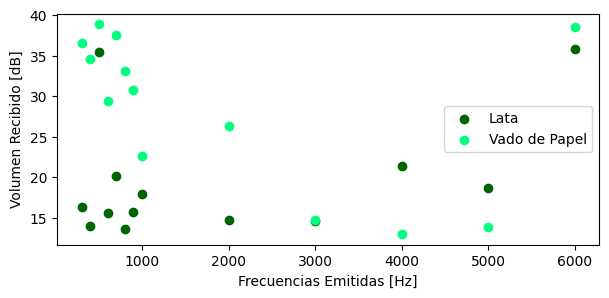

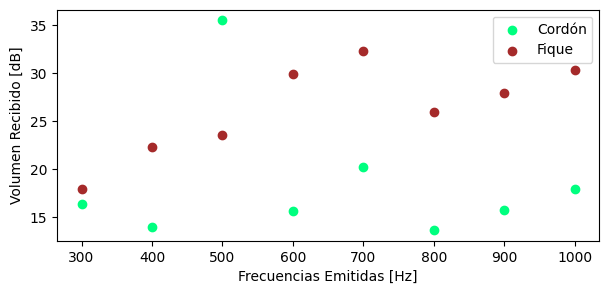

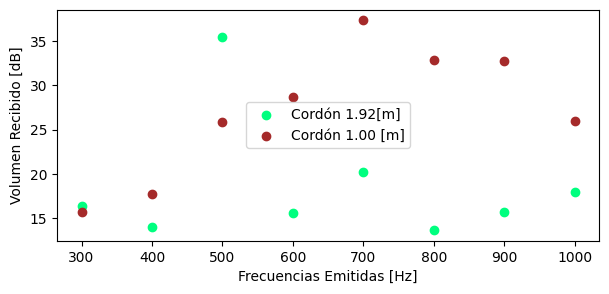

In [ ]:
plt.figure(figsize=(7, 3))

# Graficar las segundas columnas contra las primeras
plt.scatter(dfs[2]['FI'][:],dfs[2]['A'][:], label='Lata', marker='o', color='darkgreen')
plt.scatter(dfs[6]['FI'][:],dfs[6]['A'][:], label='Vado de Papel', marker='o', color='springgreen')
#plt.scatter(dfs[10]['FI'][:8],dfs[10]['A'][:8], label='Volumen Máximo', marker='o', color='brown')
# Agregar etiquetas y título al gráfico
plt.xlabel('Frecuencias Emitidas [Hz]')
plt.ylabel('Volumen Recibido [dB]')
plt.legend()

# Mostrar el gráfico
plt.show()

plt.figure(figsize=(7, 3))

# Graficar las segundas columnas contra las primeras
plt.scatter(dfs[2]['FI'][:8],dfs[2]['A'][:8], label='Cordón', marker='o', color='springgreen')
plt.scatter(dfs[12]['FI'][:8],dfs[12]['A'][:8], label='Fique', marker='o', color='brown')
# Agregar etiquetas y título al gráfico
plt.xlabel('Frecuencias Emitidas [Hz]')
plt.ylabel('Volumen Recibido [dB]')
plt.legend()

# Mostrar el gráfico
plt.show()

plt.figure(figsize=(7, 3))

# Graficar las segundas columnas contra las primeras
plt.scatter(dfs[2]['FI'][:8],dfs[2]['A'][:8], label='Cordón 1.92[m]', marker='o', color='springgreen')
plt.scatter(dfs[10]['FI'][:8],dfs[10]['A'][:8], label='Cordón 1.00 [m]', marker='o', color='brown')
# Agregar etiquetas y título al gráfico
plt.xlabel('Frecuencias Emitidas [Hz]')
plt.ylabel('Volumen Recibido [dB]')
plt.legend()

# Mostrar el gráfico
plt.show()